In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
le = LabelEncoder()
neigh = KNeighborsClassifier()
svc = SVC()

# Reading dataset
Reading dataset and checking for outliers

In [3]:
df=pd.read_csv('income_evaluation.csv')

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# there arent any exceptional outliers and all the values can be considered

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Cleaning Datset
Removing null values and duplicates

In [8]:
df.drop_duplicates(inplace=True,ignore_index=True,keep='first')
df=df.dropna()
#resetting index
df.reset_index(inplace=True,drop=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [10]:
a=['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income']

In [11]:
#all column uniques value with count
for i in range(len(a)):
    print(df[a[i]].value_counts())

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
123011    13
164190    13
203488    13
113364    12
148995    12
          ..
65078      1
68318      1
284211     1
312881     1
229376     1
Name:  fnlwgt, Length: 21648, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name:  education, dtype: i

### It is visible that the dataset is a little skewed with ratio of '<=50k' : '>50k' being around 3:1

In [12]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

### There are no direct null values but unknown values are marked as "?"
Removing these value

In [13]:
# we can see there are no null values but there are ' ?' values which are basically null values
# so we will remove them
# only the folowing three columns have ' ?'
df_0=df[df[' native-country'] == ' ?']
df=df.drop(df_0.index)
df.reset_index(inplace=True,drop=True)

df_1=df[df[' workclass'] == ' ?']
df=df.drop(df_1.index)
df.reset_index(inplace=True,drop=True)

df_2=df[df[' occupation'] == ' ?']
df=df.drop(df_2.index)
df.reset_index(inplace=True,drop=True)

In [14]:
#all column uniques value with count
#recheck to see all ' ?' values are removed
for i in range(len(a)):
    print(df[a[i]].value_counts())

36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name:  workclass, dtype: int64
203488    13
148995    12
113364    12
123011    12
164190    12
          ..
110172     1
34393      1
288341     1
239415     1
229376     1
Name:  fnlwgt, Length: 20263, dtype: int64
 HS-grad         9834
 Some-college    6669
 Bachelors       5042
 Masters         1626
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          556
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          287
 1st-4th          149
 Preschool         44
Name:  education, dtype: int64
9     9834
10    6669
13    5042
14    1626
11    1307
7     1048

# Visualization

In [15]:
one = 0
zero = 0
m_1 = 0
m_0 = 0
f_1 = 0
f_0 = 0
for i in range(df.shape[0]):
    if df[' income'].values[i] == " >50K":
        if df[' sex'].values[i] == ' Male':
            m_1 += 1
        else:
            f_1 += 1
        one += 1
    else:
        if df[' sex'].values[i] == ' Male':
            m_0 += 1
        else:
            f_0 += 1
        zero += 1

Text(0.5, 1.0, 'Income Distribuiton')

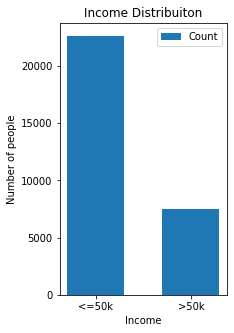

In [16]:
income=['<=50k','>50k']
fig = plt.figure(figsize=(3,5))
xpos = np.arange(len(income))
plt.bar(xpos,(zero,one),label="Count",width=0.6,align='center')
plt.xticks(xpos,income)
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.legend()
plt.title("Income Distribuiton")

## What percentage of women earn above 50k and what percentage of men earn above 50k?

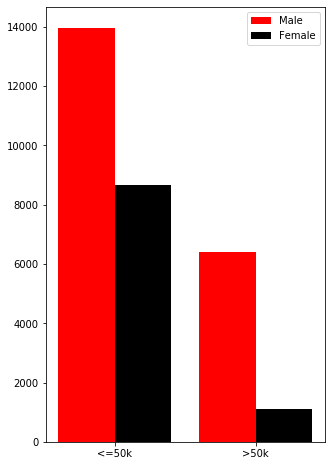

In [17]:
fig,ax=plt.subplots(figsize=(5,8))
a = ax.bar(xpos - .2, (m_0,m_1), width = .4 , label = "Male",color='red')
b = ax.bar(xpos + .2, (f_0,f_1), width = .4, label = "Female",color='black')
plt.xticks(xpos , ('<=50k','>50k'))
plt.legend()

In [18]:
print("Percentage of women earning above 50k is",f_1*100/(f_1+f_0),"%")
print("Percentage of men earning above 50k is",m_1*100/(m_1+m_0),"%")

Percentage of women earning above 50k is 11.378287117568812 %
Percentage of men earning above 50k is 31.395463026612983 %


## What is the nationality of people with highest and lowest average education level?

In [19]:
country=list()
for i in df[' native-country'].unique():
    country.append(i.strip())
country

['United-States',
 'Cuba',
 'Jamaica',
 'India',
 'Mexico',
 'Puerto-Rico',
 'Honduras',
 'England',
 'Canada',
 'Germany',
 'Iran',
 'Philippines',
 'Poland',
 'Columbia',
 'Cambodia',
 'Thailand',
 'Ecuador',
 'Laos',
 'Taiwan',
 'Haiti',
 'Portugal',
 'Dominican-Republic',
 'El-Salvador',
 'France',
 'Guatemala',
 'Italy',
 'China',
 'South',
 'Japan',
 'Yugoslavia',
 'Peru',
 'Outlying-US(Guam-USVI-etc)',
 'Scotland',
 'Trinadad&Tobago',
 'Greece',
 'Nicaragua',
 'Vietnam',
 'Hong',
 'Ireland',
 'Hungary',
 'Holand-Netherlands']

In [20]:
country_total=dict()
country_count={}
for i in range(df.shape[0]):
    for j in country:
        if df[' native-country'].values[i].strip()==j:
            country_total[j]=country_total.get(j,0) + df[' education-num'].values[i]
            country_count[j]=country_count.get(j,0) + 1
#data is a skewed since it is america's income and has most peoples native country as america

In [21]:
country_avg = dict([(k, country_total[k]/country_count[k]) for k in set(country_total) & set(country_count)])
country_avg

{'Columbia': 9.446428571428571,
 'Poland': 10.160714285714286,
 'Vietnam': 9.515625,
 'Peru': 9.433333333333334,
 'Hungary': 10.76923076923077,
 'Canada': 10.672897196261681,
 'Italy': 8.735294117647058,
 'Outlying-US(Guam-USVI-etc)': 10.285714285714286,
 'South': 11.056338028169014,
 'Cambodia': 8.722222222222221,
 'Laos': 8.647058823529411,
 'Japan': 11.35593220338983,
 'Nicaragua': 8.666666666666666,
 'Trinadad&Tobago': 8.333333333333334,
 'Iran': 12.452380952380953,
 'Germany': 11.109375,
 'Philippines': 10.96808510638298,
 'China': 11.235294117647058,
 'Jamaica': 9.8125,
 'England': 11.127906976744185,
 'Haiti': 8.857142857142858,
 'United-States': 10.22257794593808,
 'France': 12.37037037037037,
 'Portugal': 6.852941176470588,
 'Dominican-Republic': 7.08955223880597,
 'Ireland': 10.083333333333334,
 'India': 12.43,
 'Scotland': 10.363636363636363,
 'Holand-Netherlands': 10.0,
 'Puerto-Rico': 8.339449541284404,
 'Mexico': 6.145214521452146,
 'Cuba': 9.695652173913043,
 'El-Salvado

Text(0.5, 1.0, 'Average Education Level of each Nationality in US')

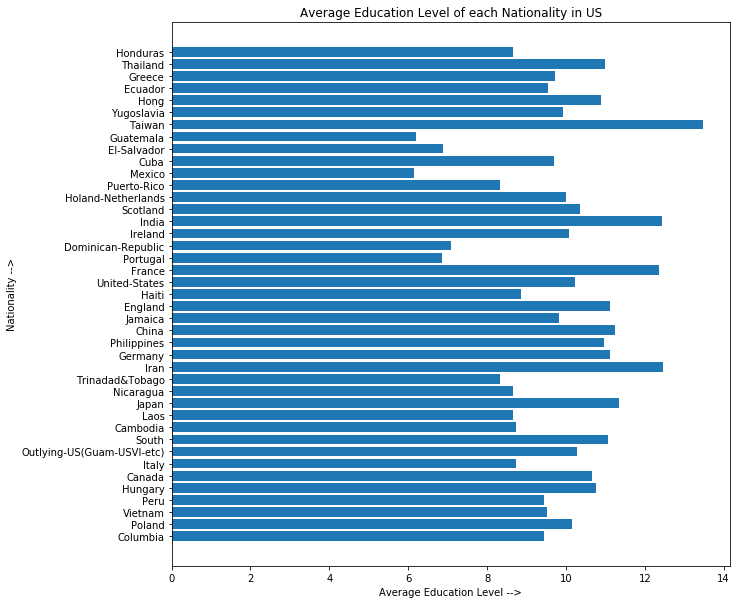

In [22]:
fig = plt.figure(figsize=(10,10))
xpos=np.arange(len(country_avg.keys()))
plt.barh(xpos,country_avg.values())
plt.yticks(xpos,country_avg.keys(),rotation=0)
plt.ylabel("Nationality -->")
plt.xlabel("Average Education Level -->")
plt.title("Average Education Level of each Nationality in US")

In [23]:
c_sorted=sorted(([x,y] for y,x in country_avg.items()),reverse= True)
print("Country with heighest average education level =",c_sorted[0])
print("Country with lowest average education level =",c_sorted[-1])

Country with heighest average education level = [13.476190476190476, 'Taiwan']
Country with lowest average education level = [6.145214521452146, 'Mexico']


# Label Encoding Columns

In [24]:
#label encoding
#replacing income vlaues with 0 and 1
df[' income']=df[' income'].replace([" <=50K"," >50K"],[0,1])

In [25]:
# label encoding rest of the columns using the le.fit_transform function
# not encoding education since education-num is already a encoded version of that column
df[[' workclass',' marital-status',' occupation', ' race', ' sex',' native-country']] = df[[' workclass',' marital-status',' occupation', ' race', ' sex',' native-country']].apply(le.fit_transform)

# Checking correlation

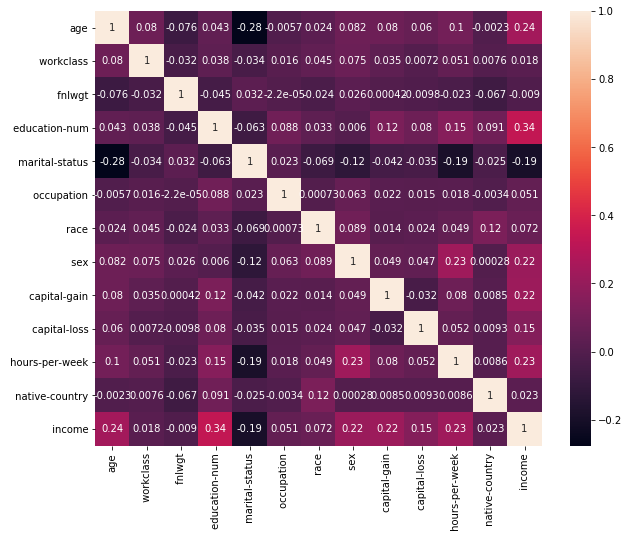

In [26]:
#heatmap to check correlation between different columns
fig = plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True)
#income is displayed below to have relatively high correlations but it is dependant variable

# Converting Data to required X and y
where, 

        X = clean (label encoded) independant variables which are required to predict y

        y = Dependant or Target variable

In [27]:
#removing education column since education-num has the same values in encoded format
X=df[['age', ' workclass', ' fnlwgt',' education-num', ' marital-status',
       ' occupation', ' race', ' sex',  ' capital-gain',
       ' capital-loss',' hours-per-week', ' native-country']]

In [28]:
X = X.values

In [29]:
X = np.append(np.ones((X.shape[0],1)),X,axis=1)
y = df[' income'].values

In [30]:
#converting y from 1d to 2d as to pass it through costfunction multiplication
y = np.reshape(y,(y.shape[0],1))
y.shape

(30139, 1)

In [31]:
print(X,'\n',X.shape)

[[ 1. 39.  5. ...  0. 40. 38.]
 [ 1. 50.  4. ...  0. 13. 38.]
 [ 1. 38.  2. ...  0. 40. 38.]
 ...
 [ 1. 58.  2. ...  0. 40. 38.]
 [ 1. 22.  2. ...  0. 20. 38.]
 [ 1. 52.  3. ...  0. 40. 38.]] 
 (30139, 13)


In [32]:
#normalization
for i in range(X.shape[1]):
    norm = np.linalg.norm(X[:,i])
    X[:,i] = X[:,i]/norm
# X_1.shape

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Logistic Regression(with regularization) from scratch

In [34]:
# defining sigmoid function which is used to restrict the output values between 0 and 1
def sigmoid(x):
    sig= 1 / ( (np.e**-x) + 1 )
    return sig
sigmoid(0)

0.5

In [35]:
# defining cost function with regularization which calculates the cost of the logistic
# regression function 
# lam variable is used to make the theta smaller so that variables are less dependant on a single big theta value
def costFunc(X,y,theta,lam):
    m = y.shape[0]
    z = np.dot(X,theta)
    h = sigmoid(z)
    cost = sum(-(y*np.log(h) + (1-y)*np.log(1-h)))
    reg = (lam/2)*sum(theta*theta)
    cost = (cost+reg)/m
    grad_reg = (lam/m)*theta
    grad_old = np.dot(np.transpose(X),(h-y))
    # the first row of X is only 1 so therefore we dont reduce the first grad term and only the following ones
    grad_old[1:] = grad_old[1:] + grad_reg[1:]
    grad = grad_old
    return cost[0],grad
# return the cost and gradient calculaed

In [36]:
# defining gradiesnt descent function which takes all the values as input and iterates over them to reduce the theta
# to a final amount which can be used to calculate or predict y more accurately
# reduces theta by the preoduct of gradient and alpha (grad returned from cost func)
# the more the value of alpha the faster the cost decreases but has to be neither too big nor too small for best performance
# to reach global minimmum
def gradDescent(X,y,theta,iters,alpha,lam):
    cost_all=[]
    for i in range(iters):
        cost,grad = costFunc(X,y,theta,lam)
        cost_all.append(cost)
        theta -= (alpha*grad)
    return cost_all , theta
# it returns all costs over 'iters' iteration so we can represent them graphically and see

In [37]:
# defining the predict function which takes a variable thresh between 0 and 1 use to make prediction 
# whether the output is one or 0, more skewed dataset require a lower threshhold i.e. smaller value of thresh
def predict(X,all_theta,thresh):
    p = sigmoid(np.dot(X,theta))
    for i in range(X.shape[0]):
        if p[i] > thresh : p[i]=1
        if p[i] <= thresh :p[i]=0
    return p

In [38]:
#initialising theta to 0 and testing cost and grad
init_theta = np.zeros((X.shape[1], 1))
cost,grad = costFunc(X_train,y_train,init_theta,0.06)
print(cost)
print(grad)

0.6931471805600897
[[32.65442477]
 [26.5494918 ]
 [29.58197528]
 [28.70790092]
 [27.08728714]
 [33.78227365]
 [25.38682166]
 [30.93683854]
 [19.90757516]
 [-7.56875099]
 [-0.84984388]
 [27.70165743]
 [32.03579964]]


In [39]:
#initialising theta again since theta is changed after each run
init_theta = np.zeros((X.shape[1], 1))
#trial of multiple alpha and lamda value proved alpha = 0.16 and lamba =0.01 to give best result
costs,theta = gradDescent(X_train,y_train,init_theta,600,0.15,0.01)

In [40]:
print("Final Cost =",costs[-1])

Final Cost = 0.48596372513417696


Text(0.5, 1.0, 'Cost Change with Every Iteration')

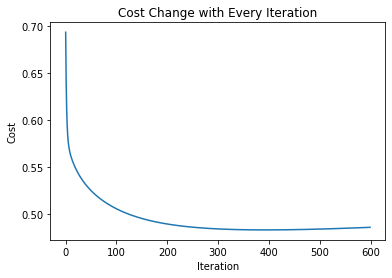

In [41]:
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Change with Every Iteration')

In [42]:
#predictng and checking unique values
y_pred=predict(X_test,theta,0.325)
u,c = np.unique(y_pred,return_counts=True)
print(u,c)

[0. 1.] [5598 1937]


In [43]:
#f1 score and accuracy
a=[]
b=[]
a.append(f1_score(y_test,y_pred))
b.append(accuracy_score(y_test,y_pred))
(f1_score(y_test,y_pred)),(accuracy_score(y_test,y_pred))

(0.542782152230971, 0.7688122096881221)

# Support Vector Machine

In [44]:
#svm implementation
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
#svm f1 score and accuracy
a.append(f1_score(y_test,y_pred1))
b.append(accuracy_score(y_test,y_pred1))
(f1_score(y_test,y_pred1)),(accuracy_score(y_test,y_pred1))

(0.6246786632390745, 0.8449900464499005)

# K- Nearest Neighbors

In [46]:
# knn implementation
# best accuracy with 21
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train,y_train)
y_pred2 = neigh.predict(X_test)

C:\Users\shree\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [47]:
#knn score adn accuracy
a.append(f1_score(y_test,y_pred2))
b.append(accuracy_score(y_test,y_pred2))
(f1_score(y_test,y_pred2)),(accuracy_score(y_test,y_pred2))

(0.6579785693599768, 0.8432647644326476)

# Checking also with built in Logistic Regression

In [48]:
# score with in built
# with different penalty it yields much better result but still knn is best
# logReg = LogisticRegression(penalty='l1',solver='liblinear')
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred_in = logReg.predict(X_test)
a.append(f1_score(y_test,y_pred_in))
b.append(accuracy_score(y_test,y_pred_in))
u,c = np.unique(y_pred_in,return_counts=True)
u,c
# f1_score(y_test,y_pred_in),accuracy_score(y_test,y_pred_in)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0], dtype=int64), array([7535], dtype=int64))

# Accuracy and f1-score of each algorithm

In [49]:
print('Name                ','F1_score          ','Accuracy')
print('LogReg(from scratch)',a[0],b[0])
print('Support vector      ',a[1],b[1])
print('K-Nearest Neighbors ',a[2],b[2])
print('LogReg(in built)    ',a[3],'              ',b[3])

Name                 F1_score           Accuracy
LogReg(from scratch) 0.542782152230971 0.7688122096881221
Support vector       0.6246786632390745 0.8449900464499005
K-Nearest Neighbors  0.6579785693599768 0.8432647644326476
LogReg(in built)     0.0                0.7514266755142668


In [50]:
# in built log reg has good accuracy but 0 score which means it is predicting all values 0 and
# hence is worse than logreg from scratch but some using l1 penalty with liblinear will solve this problem
# knn still performs best

# Conclusion

In [51]:
print("K-Nearest Neighbors has the best accuracy and score and is reliable for this dataset!")
print("Accuracy = {} %".format(b[2]))
print("F1-score =",a[2])

K-Nearest Neighbors has the best accuracy and score and is reliable for this dataset!
Accuracy = 0.8432647644326476 %
F1-score = 0.6579785693599768
